### Tutorial: Solving 2D Poisson's equation:
#### Using: Jacobi, Gauss-Seidel and Red-Black Gauss-Seidel


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Jacobi_2D(sol,B):
    Niter,Nx,Ny = sol.shape
    for iter in range(1,Niter,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[iter,i,j] = 0.25*(-B[i,j] + (sol[iter-1,i+1,j]+sol[iter-1,i-1,j]
                                     +sol[iter-1,i,j+1]+sol[iter-1,i,j-1]))
    return sol

In [3]:
def Gauss_Seidel_2D(sol,B):
    Niter,Nx,Ny = sol.shape
    for iter in range(1,Niter,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[iter,i,j] = 0.25*(-B[i,j] + sol[iter-1,i+1,j]+sol[iter,i-1,j]
                                     +sol[iter-1,i,j+1]+sol[iter,i,j-1])
    return sol

In [4]:
def Red_Black_Gauss_Seidel_2D(sol,B):
    Niter,Nx,Ny = sol.shape
    for iter in range(1,Niter,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                if (i+j)%2==0:
                    sol[iter,i,j] = 0.25*(-B[i,j] + sol[iter-1,i+1,j]+sol[iter-1,i-1,j]+sol[iter-1,i,j+1]+sol[iter-1,i,j-1])
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                if (i+j)%2!=0:
                    sol[iter,i,j] = 0.25*(-B[i,j] + sol[iter,i+1,j]+sol[iter,i-1,j]+sol[iter,i,j+1]+sol[iter,i,j-1])
    return sol

In [5]:
Nx    = 100
Ny    = 100
xmax  = 10
xmin  = 0
ymax  = 10
ymin  = 0
Niter = 200

x     = np.linspace(xmin,xmax,Nx)
y     = np.linspace(ymin,ymax,Ny)

x_mesh,y_mesh = np.meshgrid(x,y)

sol                = np.zeros(((Niter,len(x),len(y))))
sol[0,Nx//2,Ny//2] = 1.0

sol_GS                = np.zeros(((Niter,len(x),len(y))))
sol_GS[0,Nx//2,Ny//2] = 1.0

sol_RB_GS                = np.zeros(((Niter,len(x),len(y))))
sol_RB_GS[0,Nx//2,Ny//2] = 1.0


In [6]:
xc = x[Nx//2]
yc = y[Ny//2]
dx = x[1]-x[0]

B  = np.zeros((len(x),len(y)))
B  = dx**2*np.exp(-((x_mesh-xc)**2 + (y_mesh-yc)**2))

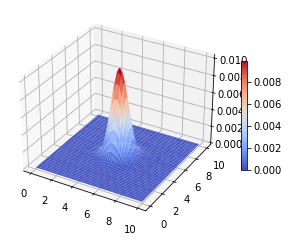

In [7]:
#%matplotlib notebook
fig  = plt.figure(0)
axes = fig.add_subplot(projection='3d')
surf = axes.plot_surface(x_mesh, y_mesh, B,cmap='coolwarm')
fig.colorbar(surf, shrink=0.5, aspect=20)
plt.show()

In [8]:
sol       = Jacobi_2D(sol,B)
sol_GS    = Gauss_Seidel_2D(sol_GS,B)
sol_RB_GS = Red_Black_Gauss_Seidel_2D(sol_RB_GS,B)

<IPython.core.display.Javascript object>


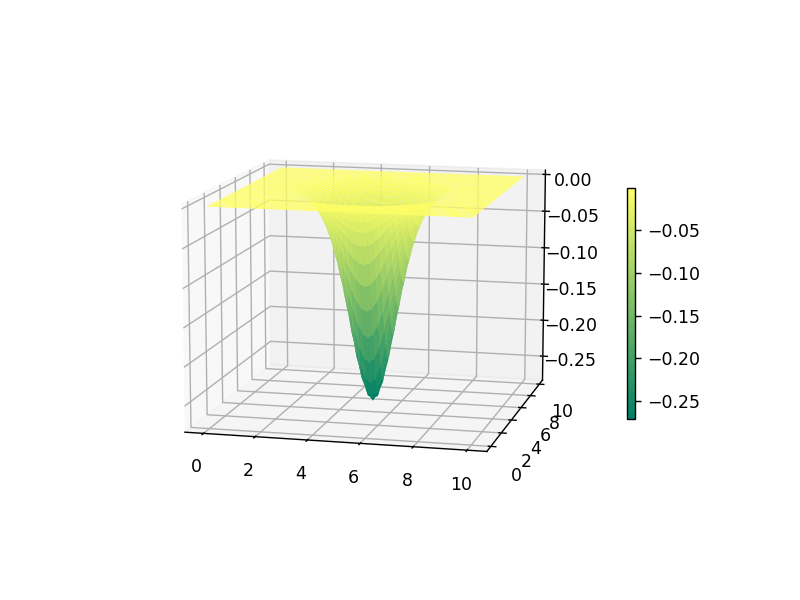

In [11]:
%matplotlib notebook
fig  = plt.figure(1)
axes = fig.add_subplot(projection='3d')
surf1 = axes.plot_surface(x_mesh, y_mesh, sol[-1],      cmap='summer')
surf2 = axes.plot_surface(x_mesh, y_mesh, sol_GS[-1],   cmap='cool')
surf3 = axes.plot_surface(x_mesh, y_mesh, sol_RB_GS[-1],cmap='autumn')
fig.colorbar(surf1, shrink=0.5, aspect=30)
fig.colorbar(surf2, shrink=0.5, aspect=30)
fig.colorbar(surf3, shrink=0.5, aspect=30)
plt.show()